In [10]:
import os
import random
import imutils
import numpy as np
import json
import matplotlib.pyplot as plt
import cv2
with open('./cat_dog/cat_dog/cat_dog_annotations.json', "r") as json_file:
    data = json.load(json_file)



In [11]:
# Fetch an image and data from VGG formatted JSON annotations
filename, image_metadata = next(iter(data['_via_img_metadata'].items()))


print(f"Filename: {filename}")
print(f"Region: {image_metadata['regions']}")
print(f"Size: {image_metadata['size']}")



Filename: 1.jpeg45602
Region: [{'shape_attributes': {'name': 'rect', 'x': 284, 'y': 27, 'width': 365, 'height': 478}, 'region_attributes': {'class': {'dog': True}}}]
Size: 45602


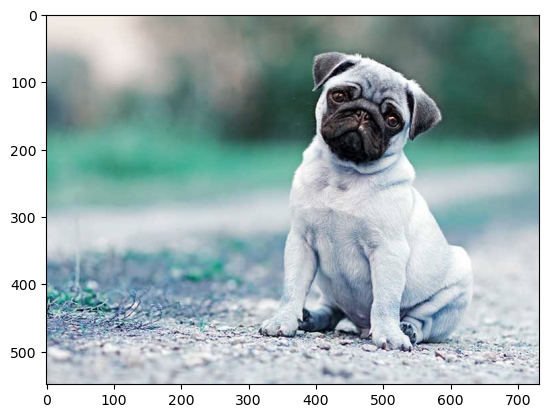

In [12]:
# Load that image
filename = image_metadata['filename']
first_image = cv2.imread(f'./cat_dog/cat_dog/{filename}')
plt.imshow(first_image)

X: 284
Y: 27
Width: 365
Height: 478
Animal class: dog


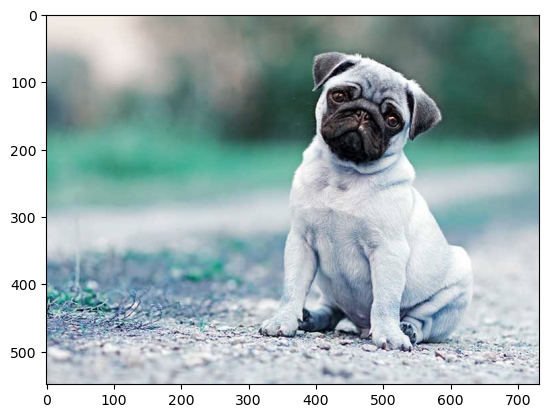

In [13]:
# Iterate over each region in the first image
for region in image_metadata['regions']:
    shape_attributes = region['shape_attributes']
    x = shape_attributes['x']
    y = shape_attributes['y']
    width = shape_attributes['width']
    height = shape_attributes['height']
    
    region_attributes = region['region_attributes']
    animal_class = next(iter(region_attributes['class']))
    
    # cv2.rectangle(first_image, (x, y), (x + width, y + height), (255, 0, 0), 2)

    
    print(f"X: {x}")
    print(f"Y: {y}")
    print(f"Width: {width}")
    print(f"Height: {height}")
    print(f"Animal class: {animal_class}")
    
    plt.imshow(first_image)

In [14]:
# Resize first image from resize scale percentage 60 to 100 randomly. 

if not os.path.exists('result'):
        os.makedirs('result')
        
for img_id, img_data in data['_via_img_metadata'].items():
        img_name = img_data['filename']
        img = cv2.imread(f'./cat_dog/cat_dog/{img_name}')

        
        name = 1
        for angle in range(0, 360, 5):
                resize_scale = random.randint(60, 100) / 100
                img_resized = cv2.resize(img, None, fx=resize_scale, fy=resize_scale)
                rotate_image = imutils.rotate_bound(img_resized, angle)
                
                for region in image_metadata['regions']:
                        x = region['shape_attributes']['x']
                        y = region['shape_attributes']['y']
                        width = region['shape_attributes']['width']
                        height = region['shape_attributes']['height']
                        bbox = [x, y, width, height]
                        
                        a,b,c,d = bbox

                        center_x = a + c / 2

                        center_y = b + d / 2

                        new_width = c * resize_scale
                        new_height = d * resize_scale

                        new_center_x = center_x * resize_scale

                        new_center_y = center_y * resize_scale
                        
                        rotated_image_width = rotate_image.shape[1]
                        rotated_image_height = rotate_image.shape[0]
                        rotated_image_center = (rotated_image_width/2, rotated_image_height/2)

                        rotation_matrix = cv2.getRotationMatrix2D(rotated_image_center, -angle, 1)


                        new_center_x, new_center_y = np.dot(rotation_matrix, np.array([new_center_x, new_center_y, 1]))

                        a = int(new_center_x - new_width / 2)
                        b = int(new_center_y - new_height / 2)

                        new_width = int(new_width)
                        new_height = int(new_height)

                        final_adjusted = [a, b, new_width, new_height]

                        cv2.rectangle(rotate_image, (a, b), (a+new_width, b+new_height), (0, 255, 0), thickness=2)

                        img_name = img_name.split('.')[0]

                        cv2.imwrite(f'result/{img_name}_{name}.png', rotate_image)
                        name += 1




